# Bike Sharing Hourly Count Prediction Using Machine Learning Models

Prince Joseph Erneszer Javier
<br>Reynaldo Tugade Jr.
<br>MS Data Science
<br>Asian Institute of Management

## Abstract

## Introduction

## Data

## Methodology

### Data Preprocessing

Features selected were year, holiday, temp, hum, windspeed, season, weathersit, mnth, hr, and weekday. The target variable was cnt. One-hot encoding was then applied on season, weathersit, mnth, hr, and weekday. The features data contained 56 features. The features were  then scaled using min-max scaling given by:

\begin{equation}
X_{scaled} = \frac{X - min(X)}{max(X) - min(X)}
\end{equation}

where X is the feature matrix. Since the maximum value of cnt was found to be 977, cnt was divided by 1000 to scale it to values between 0 and 1. 

The last 20 days were set for testing set. In the remaining dataset, the last 60 days were set as the validation set. Finally, the remaining dataset was used as training set. 

The training set was used to train the machine learning models. The validation set was used to evaluate the model during training, and finally, the testing set was used to test the accuracy of the model after training using the best parameters.

### Neural Network Modeling

A feed-forward neural network having 56 input nodes, 56 nodes in one hidden layer, and 1 output node was developed. The learning rate from input to hidden and hidden to output were 0.001 and 0.0001 respectively. The loss function used is given by:

\begin{equation}
\frac{1}{2}(\Psi_{NN} - \Psi_{true})^2
\end{equation}

where $\Psi_{NN}$ is the predicted value and $\Psi_{true}$ is the true value. The input, hidden, and output activation functions were linear, sine, and sigmoid respectively. The neural network was trained and validated using the training and validation sets over 12,000 iterations. The testing set was used to evaluate the predictive accuracy of the model. The accuracy metric used was the coefficient of determination, $r^2$.

## Discussion of Results

## Conclusion

## References

# Code

## Loading the Dataset

#### About the Dataset


In [18]:
# Import packages
import pandas as pd
import numpy as np

# Load the dataset as a pandas dataframe
dpath = 'hour.csv'
rides = pd.read_csv(dpath)
print("> Dataset loaded.")

# convert date time values to datetime format
rides.dteday = pd.to_datetime(rides.dteday)
print(f"> {rides.shape} rows and columns.")

# sort values by datetime
rides = rides.sort_values(by=['dteday', 'hr'])
print("> Converted datetime values to datetime.")

> Dataset loaded.
> (17379, 17) rows and columns.
> Converted datetime values to datetime.


In [6]:
# First five rows in the dataset
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
# maximum values of casual, registered, and cnt
np.max(rides[['cnt']])

cnt    977
dtype: int64

In [8]:
# Information about the dataset
rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null datetime64[ns]
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(12)
memory usage: 2.4 MB


## Exploratory Data Analysis

In [9]:
# Quick stats
rides.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


(array([734107., 734197., 734289., 734381., 734472., 734563., 734655.,
        734747., 734838.]), <a list of 9 Text xticklabel objects>)

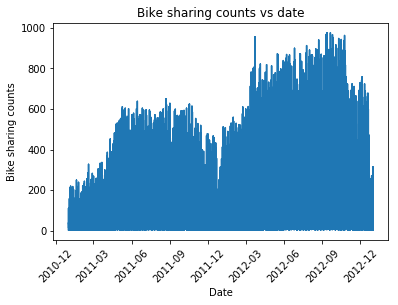

In [10]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Hourly counts over time
plt.plot(rides.dteday, rides.cnt)
plt.xlabel('Date')
plt.ylabel('Bike sharing counts')
plt.title('Bike sharing counts vs date')
plt.xticks(rotation=45)

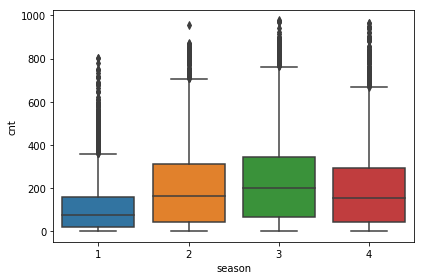

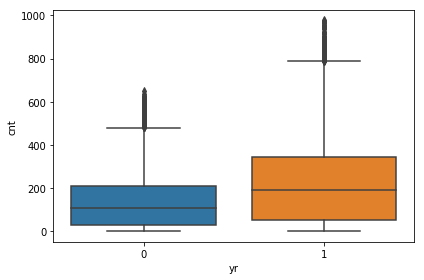

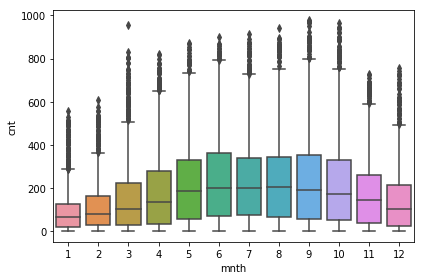

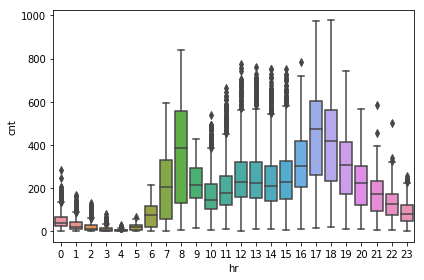

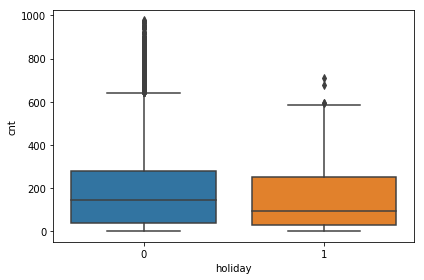

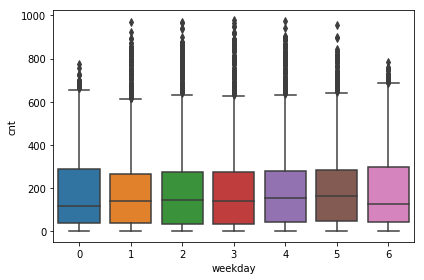

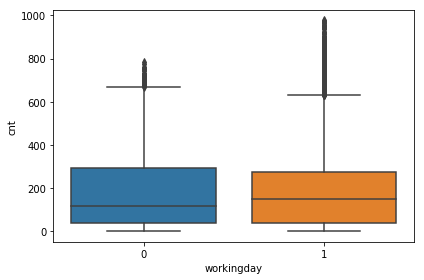

In [11]:
for x in ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday']:
    sns.boxplot(x=x, y="cnt", data=rides)
    plt.tight_layout()
    plt.show()

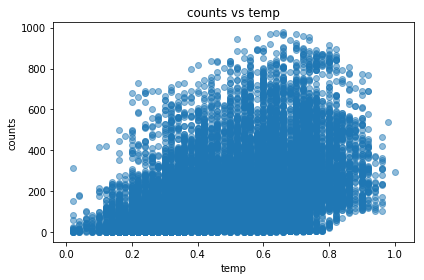

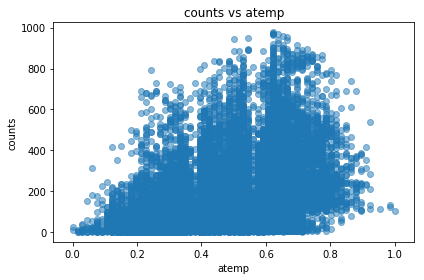

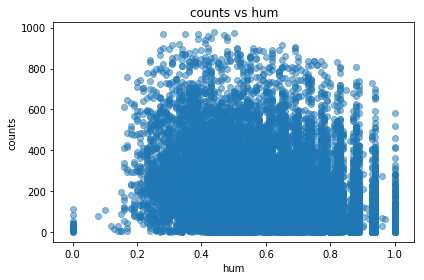

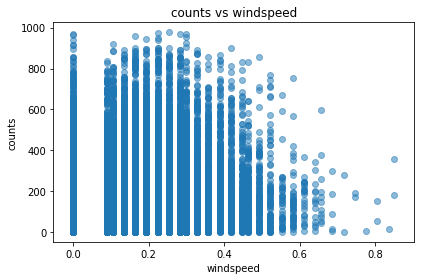

In [12]:
for x in ['temp', 'atemp', 'hum', 'windspeed']:
    plt.scatter(rides[x], rides['cnt'], alpha=0.5)
    plt.ylabel('counts')
    plt.xlabel(x)
    plt.title(f'counts vs {x}')
    plt.tight_layout()
    plt.show()

## Data Preprocessing

In [124]:
# Import packages
from sklearn.preprocessing import MinMaxScaler

# Identify the fields that need to be one-hot encoded, dropped
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
fields_to_drop = ['instant', 'dteday', 'atemp', 'workingday', 'casual', 'registered']
# quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']

# Identify the target fields
target_fields = ['cnt']

# Apply one-hot encoding on categorical features
rides_2 = pd.get_dummies(rides, columns=dummy_fields, drop_first=False)
print("> Applied one-hot encoding on categorical features")
print(f"> {rides_2.shape} rows and columns.")

# Drop some unnecessary columns
rides_2 = rides_2.drop(columns=fields_to_drop)
print("> Dropped unnecessary fields.")

# Separate the data into features and targets
X = rides_2.drop(target_fields, axis=1)
y = rides_2[target_fields]
print("> Separated into features X and target y")
print(f"> {X.shape} rows and columns in features dataset.")
print(f"> {y.shape} rows and columns in target dataset.")

# print columns in dataset
print(f"> Features selected: {list(X.columns)}")
print(f"> Target: {y.columns[0]}")

# Scale targets and features to have values in [0, 1]
# In the case of the target, we simply divide by 1000 to maintain interpretability
mmsc = MinMaxScaler()
X_2 = mmsc.fit_transform(X)
y = y / 1000
print(f"> Targets and features scaled.")

# Split into training, validation (during training) and test sets (after training).
# Set the testing set as the last 20 days
# From the remaining data, set the validation set as the last 60 days
# Set the remaining dataset as the training set

X_test = X_2[-20 * 24:]  # last 20 days
X_valid = X_2[-80 * 24:-20 * 24]  # last 80 - 20 = 60 days
X_train = X_2[:-80 * 24]  # from 0 to last 80 days
y_test = y[-20 * 24:]  # last 20 days
y_valid = y[-80 * 24:-20 * 24]  # last 80 - 20 = 60 days
y_train = y[:-80 * 24]  # from 0 to last 80 days
print(f"> Split into training, validation, and testing sets.")
[print(f"> {n}: {s.shape}") for n, s in zip(
    ('X_test', 'X_valid', 'X_train'), (X_test, X_valid, X_train))]
[print(f"> {n}: {s.shape}") for n, s in zip(
    ('y_test', 'y_valid', 'y_train'), (y_test, y_valid, y_train))];

> Applied one-hot encoding on categorical features
> (17379, 63) rows and columns.
> Dropped unnecessary fields.
> Separated into features X and target y
> (17379, 56) rows and columns in features dataset.
> (17379, 1) rows and columns in target dataset.
> Features selected: ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_1', 'season_2', 'season_3', 'season_4', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6']
> Target: cnt
> Targets and features scaled.
> Split into training, validation, and testing sets.
> X_test: (480, 56)
> X_valid: (1440, 56)
> X_tr

## Neural Network Training

In [33]:
from sklearn.metrics import r2_score


class NN_reg():
    # get attributes and initiate weights
    def __init__(self,
                 X_train, y_train,
                 X_test, y_test,
                 num_hidden_layers,
                 nodes=[],
                 learning_rate=(0.1, 0.1),
                 activation=('linear', 'sigmoid', 'sigmoid')):

        self.input = X_train
        self.output = y_train
        self.X_test0 = X_test  # FOR TESTING PURPOSES DURING TRAINING
        self.y_test0 = y_test  # FOR TESTING PURPOSES DURING TRAINING

        self.num_hidden_layers = num_hidden_layers
        self.nodes = nodes
        self.lr = learning_rate
        self.activation = activation

        # RANDOM SEED
        np.random.seed(42)

        # UPDATE THIS
        # initiate weights
        self.weights = []
        self.best_weights = []
        for i in range(self.num_hidden_layers + 1):
            self.weights.append(
                2 * np.random.random((self.nodes[i], self.nodes[i + 1])) - 1)
            self.best_weights.append(self.weights[i])

        self.train_errors = []
        self.train_accs = []
        self.test_accs = []

    # functions

    def f(self, x, func_name, deriv=False):
        if func_name == 'sin':
            if(deriv == True):
                return np.cos(x)
            return np.sin(x)
        elif func_name == 'tanh':
            if(deriv == True):
                return 1.7159 * (1 - (np.tanh(2 * x / 3)**2)**2) / 3
            return 1.7159 * np.tanh(2 * x / 3)
        elif func_name == 'linear':
            if(deriv == True):
                return 1
            return x
        elif func_name == 'sigmoid':
            sig = 1 / (1 + np.exp(-x))
            if(deriv == True):
                return sig * (1 - sig)
            return sig

    def feed_forward(self, num_iter):

        for iters in range(num_iter):

            # initialize
            unactivated = []
            activated = []
            unactivated_test = []
            activated_test = []
            deltas = []

            # feed forward
            # 0 layer 0 activated
            activated.append(self.f(self.input, self.activation[0]))

            for i in range(self.num_hidden_layers + 1):
                unactivated.append(
                    np.dot(activated[i], self.weights[i]))
                activated.append(
                    self.f(unactivated[i], func_name=self.activation[i + 1]))

            y_out_nn = activated[-1][:]

            # Error Function
            error = self.output - y_out_nn
            self.train_errors.append(np.mean(np.abs(error)))

            # Train Accuracy
            train_acc = r2_score(y_out_nn, self.output)
            self.train_accs.append(train_acc)

            # Test Accuracy
            # 0 layer0 activated
            activated_test.append(self.f(self.X_test0, self.activation[0]))

            for i in range(self.num_hidden_layers + 1):
                unactivated_test.append(
                    np.dot(activated_test[i], self.weights[i]))
                activated_test.append(self.f(
                    unactivated_test[i], func_name=self.activation[i + 1]))

            y_out_test = activated_test[-1][:]

            test_acc = r2_score(y_out_test, self.y_test0)
            self.test_accs.append(test_acc)

            # APPENDING BEST WEIGHTS
            if iters > 4 and test_acc > max(self.test_accs[:-1]):
                for i in range(self.num_hidden_layers + 1):
                    self.best_weights[i] = self.weights[i]

            # print iteration results
            if (iters % int(num_iter / 10)) == 0:
                print("Iteration:", iters, "Abs Error=", np.mean(
                    np.abs(error)), "Test Acc=", test_acc)

            # gradient updates
            deltas.append(error * self.f(unactivated[self.num_hidden_layers],
                                         func_name=self.activation[self.num_hidden_layers + 1], deriv=True))

            for i in range(self.num_hidden_layers):
                deltas.append(deltas[i].dot(self.weights[self.num_hidden_layers - i].T) *
                              self.f(unactivated[self.num_hidden_layers - 1 - i], func_name=self.activation[self.num_hidden_layers - i], deriv=True))

            # update weights
            self.weights[self.num_hidden_layers] += self.lr[self.num_hidden_layers] * \
                activated[self.num_hidden_layers].T.dot(deltas[0])
            for i in range(1, self.num_hidden_layers):
                self.weights[i] += self.lr[i] * \
                    unactivated[self.num_hidden_layers -
                                1 - i].T.dot(deltas[i])
            self.weights[0] += self.lr[0] * \
                activated[0].T.dot(deltas[self.num_hidden_layers])

        print("done training")

    # Predict X_test, output y_predicted
    def predict(self, X_test):
        "Predict values using best weights"

        unactivated = []
        activated = []

        # 0 layer0 activated
        activated.append(self.f(X_test, self.activation[0]))
        for i in range(self.num_hidden_layers + 1):
            unactivated.append(
                np.dot(activated[i], self.weights[i])) 
            activated.append(
                self.f(unactivated[i], func_name=self.activation[i + 1]))

        y_out_test = activated[-1][:]
        return y_out_test

In [118]:
X_train2 = X_train[:]
y_train2 = y_train.iloc[:, 0].values.reshape(-1, 1)

X_valid2 = X_valid[:]
y_valid2 = y_valid.iloc[:, 0].values.reshape(-1, 1)

nodes = [56, 56, 1]


NN_ = NN_reg(X_train2, y_train2,
             X_valid2, y_valid2,
             num_hidden_layers=1,
             nodes=nodes,
             learning_rate=(0.001, 0.0001),
             activation=('linear', 'sin', 'sigmoid'))

In [119]:
NN_.feed_forward(12000)

Iteration: 0 Abs Error= 0.23638916672092095 Test Acc= -0.509288559644135
Iteration: 1200 Abs Error= 0.038452248575154446 Test Acc= 0.7244343711884307
Iteration: 2400 Abs Error= 0.03149692815620634 Test Acc= 0.8087778276320856
Iteration: 3600 Abs Error= 0.028816617450103513 Test Acc= 0.8438630778492194
Iteration: 4800 Abs Error= 0.027211509375085888 Test Acc= 0.8621918111983373
Iteration: 6000 Abs Error= 0.026121442457499495 Test Acc= 0.8727877558328568
Iteration: 7200 Abs Error= 0.025338250427793883 Test Acc= 0.8789939781735742
Iteration: 8400 Abs Error= 0.02474672680607751 Test Acc= 0.8825317755918913
Iteration: 9600 Abs Error= 0.02428418993160381 Test Acc= 0.8844859613597797
Iteration: 10800 Abs Error= 0.02391028778054122 Test Acc= 0.8855300828069396
done training


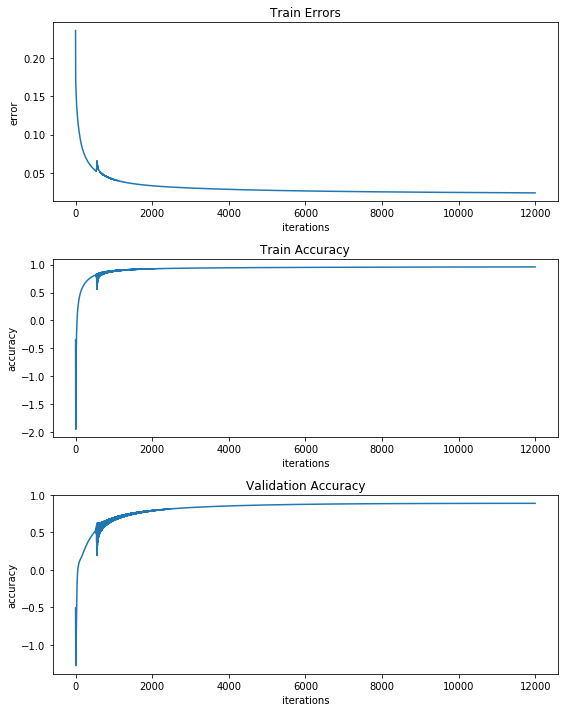

In [120]:
# Plot training error, training accuracy, and validation accuracy
f, ax = plt.subplots(3, 1, figsize=(8,10))
ax[0].plot(NN_.train_errors)
ax[0].set_title('Train Errors')
ax[0].set_xlabel('iterations')
ax[0].set_ylabel('error')

ax[1].plot(NN_.train_accs)
ax[1].set_title('Train Accuracy')
ax[1].set_xlabel('iterations')
ax[1].set_ylabel('accuracy')
                 
ax[2].plot(NN_.test_accs)
ax[2].set_title('Validation Accuracy')
ax[2].set_xlabel('iterations')
ax[2].set_ylabel('accuracy')

plt.tight_layout()

In [121]:
# accuracy on testing set
from sklearn.metrics import r2_score
y_out_test = NN_.predict(X_test2)
test_acc = r2_score(y_out_test, y_test2)
test_acc

0.8860583008229358

## Other ML Models

In this section, we define several machine learning regression functions, namely:

||Type|Name|
|:-|:-|:-|:-|
|1|Similarity-based learning|kNN Regressor|
|2|Error-based learning|Linear Regression|
|3|Error-based learning|Support Vector Machine Regressor|
|4|Information-based learning|Decision Tree Regressor|
|5|Information-based learning|Random Forest Regressor|
|6|Information-based learning|Gradient Boosting Regressor|
|7|Error-based learning|ARIMA|


#### Loading Packages

In [72]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

In [73]:
class ML_Regressor:

    def fit(self, X_train, X_test, y_train, y_test, ml_type,
            param_range, seed_settings=range(0, 3)):
        """
        Fit data to machine learning regressor. Iterate regression model 
        mutiple times. Return the maximum accuracy achieved and the
        corresponding parameter.

        Inputs
        ======
        feature: Dataframe of features
        target: Series of target values
        param_range: Range of values for parameters
        seed_settings: Range of seed settings to run

        Outputs
        =======
        acc_max: Float. Maximum regression accuracy achieved.
        param_max: Float. Regressor parameter that gives maximum accuracy.
        """

        self.param_range = param_range
        self.ml_type = ml_type

        train_acc = []
        test_acc = []

        feature_importance = []

        # Initiate counter for number of trials
        self.iterations = 0

        # Initial stuff
        self.kernel = 'rbf'

        # create an array of cols: parameters and rows: seeds
        for seed in seed_settings:

            # count one trial
            self.iterations += 1
            
            train = []
            test = []
            coefs = []

            # make a list of accuracies for different parameters
            for param in param_range:
                # build the model
                if ml_type == 'knn_reg':
                    self.clf = KNeighborsRegressor(n_neighbors=param)

                elif ml_type == 'lin_reg':
                    self.clf = LinearRegression()

                elif ml_type == 'ridge':
                    self.clf = Ridge(alpha=param)

                elif ml_type == 'lasso':
                    self.clf = Lasso(alpha=param, max_iter=self.max_iter)

                elif ml_type == 'linear_svm':
                    self.clf = LinearSVR(C=param)

                elif ml_type == 'svm':
                    self.clf = SVR(C=param, kernel=self.kernel)

                elif ml_type == 'decision_tree':
                    self.clf = DecisionTreeRegressor(max_depth=param)

                elif ml_type == 'random_forest':
                    self.clf = RandomForestRegressor(
                        max_features=int(np.log2(X_train.shape[1])), max_depth=param, n_estimators=100)

                elif ml_type == 'gbm':
                    self.clf = GradientBoostingRegressor(
                        max_features=param, n_estimators=500)

                # fit training set to classifier
                self.clf.fit(X_train, y_train)

                # record training set accuracy
                train.append(self.clf.score(X_train, y_train))

                # record generalization accuracy
                test.append(self.clf.score(X_test, y_test))

                # record coefficients if ml_type != knn_class
                # get coef @ 0.01
                if ml_type not in ("knn_reg", "svm", "decision_tree", "gbm") and param == 0.01:
                    coefs.append(self.clf.coef_)

                if ml_type in ("decision_tree", "gbm"):
                    feature_importance.append(self.clf.feature_importances_)

            # append the list to _acc arrays
            train_acc.append(train)
            test_acc.append(test)

        # compute mean and error across columns
        self.train_all = np.mean(train_acc, axis=0)
        self.test_all = np.mean(test_acc, axis=0)

        # compute mean coefficients
        if ml_type not in ("knn_reg", "svm", "decision_tree"):
            self.coefs_all = np.mean(coefs, axis=0).ravel()

        if ml_type in ("decision_tree", "gbm"):
            self.coefs_all = np.mean(feature_importance, axis=0)

        # compute variance of accuracies
        self.var_train = np.var(train_acc, axis=0)
        self.var_test = np.var(test_acc, axis=0)

        # compute the best parameter and maximum accuracy
        self.max_inds = np.argmax(self.test_all)
        self.acc_max = np.amax(self.test_all)
        self.param_max = (self.param_range)[self.max_inds]

        return np.round(self.acc_max, 4), self.param_max
    
    def predict(self, X_test, y_test):
        "Predict using optimal features"
        return self.clf.score(X_test, y_test)
        

    def plot(self, report=True):
        """
        Plot accuracy vs parameter for test and training data. Print
        maximum accuracy and corresponding parameter value. Print number of 
        trials.

        Inputs
        ======
        report: Boolean. Will show report if True

        Outputs
        =======
        Plot of accuracy vs parameter for test and training data
        Report showing number of maximum accuracy, optimal parameters
        and no. of iterations
        """

        if self.ml_type in ["linear_svm", "svm"]:
            plt.xscale("log")

        # plot train and errors and standard devs
        plt.plot(self.param_range, self.train_all, c='b',
                 label="training set", marker='.')
        plt.fill_between(self.param_range,
                         self.train_all + self.var_train,
                         self.train_all - self.var_train,
                         color='b', alpha=0.1)

        # plot test and errors and standard devs
        plt.plot(self.param_range, self.test_all,
                 c='r', label="test set", marker='.')
        plt.fill_between(self.param_range,
                         self.test_all + self.var_test,
                         self.test_all - self.var_test,
                         color='r', alpha=0.1)

        plt.xlabel('Parameter Value')
        plt.ylabel('Accuracy')
        plt.title(self.ml_type + ": Accuracy vs Parameter Value")
        plt.legend(loc=0)

        plt.tight_layout()
        plt.show()

        if report == True:
            print('Report:')
            print('=======')
            print("Max average accuracy: {}".format(
                np.round(self.acc_max, 4)))
            print("Var of accuracy at optimal parameter: {0:.4f}".format(
                self.var_test[self.max_inds]))
            print("Optimal parameter: {0:.4f}".format(self.param_max))
            print('Total iterations: {}'.format(self.iterations))

#### kNN Regressor

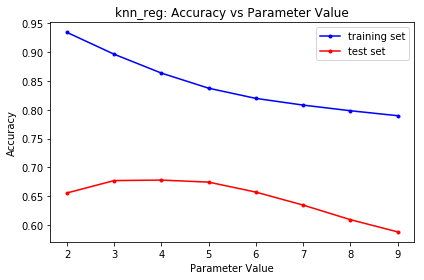

Report:
Max average accuracy: 0.6781
Var of accuracy at optimal parameter: 0.0000
Optimal parameter: 4.0000
Total iterations: 3


In [55]:
ml_reg = ML_Regressor()
param_range = range(2, 10)
_, param_knn_reg = ml_reg.fit(X_train2, X_valid2, y_train2, y_valid2, "knn_reg", param_range = param_range)
param_knn_reg = {'n neighbors', param_knn_reg}
ml_reg.plot()

# testing accuracy
# acc_knn_reg = 

In [58]:
# testing accuracy
knn = KNeighborsRegressor(n_neighbors=ml_reg.param_max)
knn.fit(X_train2, y_train2)
acc_knn_reg = knn.score(X_test2, y_test2)
acc_knn_reg

0.6781083314933734

#### Linear Regressor

In [61]:
# Linear regressor
reg = LinearRegression()
reg.fit(X_train2, y_train2)

acc_linear_reg = reg.score(X_test2, y_test2)
intercept_linear_reg = reg.intercept_
inds = np.argsort(np.abs(reg.coef_))[::-1]
top_predictor_linear_reg = X.columns[inds][0]

print("Best accuracy:",acc_linear_reg)
print("intercept:",intercept_linear_reg)
# print("coefs:", reg.coef_)
# print("Top predictor:", top_predictor_linear_reg)

Best accuracy: 0.6416938904272865
intercept: [-3.58700818e+11]


#### Lasso Regressor

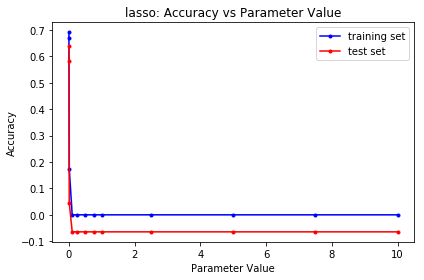

Report:
Max average accuracy: 0.6381
Var of accuracy at optimal parameter: 0.0000
Optimal parameter: 0.0001
Total iterations: 3


In [65]:
ml_reg = ML_Regressor()
ml_reg.max_iter = 10000
param_range = [0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 2.5, 5, 7.5, 10]
_, param_lasso = ml_reg.fit(X_train2, X_valid2, y_train2, y_valid2, "lasso", param_range = param_range)
param_lasso = {'alpha': param_lasso}
ml_reg.plot()
inds = np.argsort(ml_reg.coefs_all)[::-1]
top_predictor_lasso = X.columns[inds]

In [66]:
# testing accuracy
ml = Lasso(ml_reg.param_max)
ml.fit(X_train2, y_train2)
acc_lasso = ml.score(X_test2, y_test2)
acc_lasso

0.6381484891444476

#### Ridge Regressor

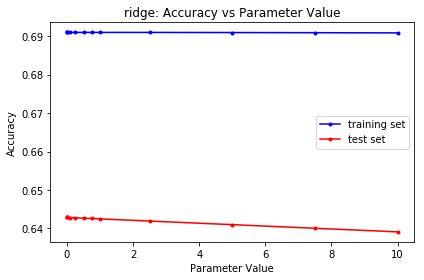

Report:
Max average accuracy: 0.6429
Var of accuracy at optimal parameter: 0.0000
Optimal parameter: 0.0001
Total iterations: 3


In [69]:
ml_reg = ML_Regressor()
param_range = [0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 2.5, 5, 7.5, 10]
acc_ridge, param_ridge = ml_reg.fit(X_train2, X_test2, y_train2, y_test2, "ridge", param_range = param_range)
param_ridge = {'alpha': param_ridge}
ml_reg.plot()
inds = np.argsort(ml_reg.coefs_all)[::-1]
top_predictor_ridge = X.columns[inds]

In [70]:
# testing accuracy
ml = Ridge(ml_reg.param_max)
ml.fit(X_train2, y_train2)
acc_ridge = ml.score(X_test2, y_test2)
acc_ridge

0.6428766215476819

#### Linear SVM Regressor

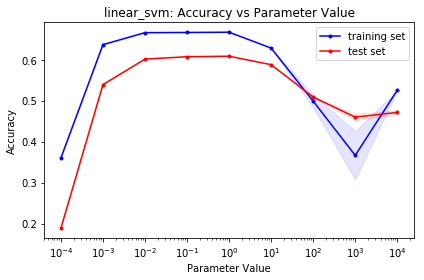

Report:
Max average accuracy: 0.6086
Var of accuracy at optimal parameter: 0.0000
Optimal parameter: 1.0000
Total iterations: 3


In [84]:
ml_reg = ML_Regressor()
param_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
acc_lsvm, param_lsvm = ml_reg.fit(X_train2, X_valid2, y_train2, y_valid2, "linear_svm", param_range = param_range)
param_lsvm = {'C': param_lsvm}
ml_reg.plot()
inds = np.argsort(ml_reg.coefs_all)[::-1]
top_predictor_lsvm = X.columns[inds]

In [85]:
# testing accuracy
ml = LinearSVR(ml_reg.param_max)
ml.fit(X_train2, y_train2)
acc_lsvm = ml.score(X_test2, y_test2)
acc_lsvm

-1.3608919152347894

#### Decision Tree

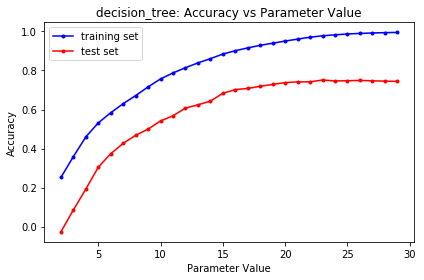

Report:
Max average accuracy: 0.7514
Var of accuracy at optimal parameter: 0.0000
Optimal parameter: 23.0000
Total iterations: 3


Index(['temp', 'hum', 'hr_17', 'hr_18', 'hr_8', 'yr', 'weekday_0', 'weekday_6',
       'hr_19', 'hr_16', 'hr_7', 'hr_20', 'hr_9', 'hr_1', 'hr_2', 'windspeed',
       'hr_3', 'hr_0', 'weathersit_3', 'hr_4', 'holiday', 'hr_5', 'hr_21',
       'season_4', 'season_1', 'hr_23', 'hr_12', 'hr_13', 'hr_22', 'hr_10',
       'hr_11', 'weekday_5', 'hr_14', 'hr_6', 'mnth_9', 'season_2', 'hr_15',
       'mnth_3', 'weathersit_1', 'mnth_8', 'mnth_4', 'weekday_2', 'mnth_7',
       'mnth_5', 'mnth_6', 'weekday_1', 'mnth_11', 'mnth_12', 'mnth_1',
       'weekday_4', 'weathersit_2', 'weekday_3', 'season_3', 'mnth_10',
       'mnth_2', 'weathersit_4'],
      dtype='object')

In [86]:
ml_reg = ML_Regressor()
param_range = list(range(2, 30))
acc_dt, param_dt = ml_reg.fit(X_train2, X_valid2, y_train2, y_valid2, "decision_tree", param_range = param_range)
param_dt = {'max_depth': param_dt}
ml_reg.plot()

inds = np.argsort(ml_reg.coefs_all)[::-1]
top_predictor_dt = X.columns[inds]
top_predictor_dt

In [87]:
# testing accuracy
ml = DecisionTreeRegressor(max_depth=ml_reg.param_max)
ml.fit(X_train2, y_train2)
acc_dt = ml.score(X_test2, y_test2)
acc_dt

0.7558744821001901

#### Random Forest

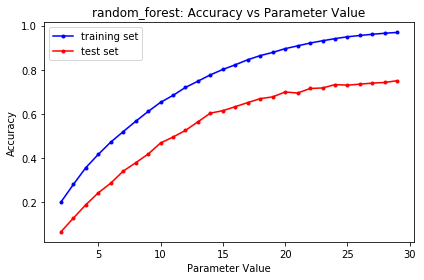

Report:
Max average accuracy: 0.7508
Var of accuracy at optimal parameter: 0.0000
Optimal parameter: 29.0000
Total iterations: 3


Index(['yr'], dtype='object')

In [88]:
ml_reg = ML_Regressor()
param_range = list(range(2, 35))
acc_rf, param_rf = ml_reg.fit(X_train2, X_valid2, y_train2, y_valid2, "random_forest", param_range = param_range)
param_rf = {'max_depth': param_rf}
ml_reg.plot()

inds = np.argsort(ml_reg.coefs_all)[::-1]
top_predictor_rf = X.columns[inds]
top_predictor_rf

In [90]:
# testing accuracy
ml = RandomForestRegressor(max_depth=ml_reg.param_max)
ml.fit(X_train2, y_train2)
acc_rf = ml.score(X_test2, y_test2)
acc_rf

0.8013592890119909

#### Gradient Boosting

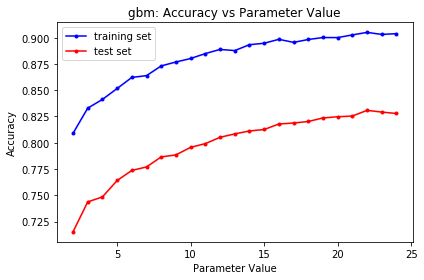

Report:
Max average accuracy: 0.8309
Var of accuracy at optimal parameter: 0.0000
Optimal parameter: 22.0000
Total iterations: 3


Index(['temp', 'weekday_0', 'weekday_6', 'yr', 'hum', 'hr_8', 'hr_18', 'hr_17',
       'season_1', 'windspeed', 'holiday', 'hr_4', 'hr_3', 'hr_2',
       'weathersit_3', 'hr_1', 'hr_5', 'weekday_3', 'weekday_2', 'hr_7',
       'weekday_4', 'hr_0', 'hr_6', 'hr_23', 'hr_19', 'hr_11', 'hr_16',
       'hr_22', 'mnth_1', 'mnth_9', 'weathersit_1', 'season_3', 'weekday_1',
       'hr_12', 'hr_13', 'hr_10', 'hr_20', 'hr_14', 'weekday_5', 'hr_9',
       'hr_15', 'season_4', 'hr_21', 'mnth_2', 'mnth_7', 'season_2', 'mnth_8',
       'mnth_10', 'mnth_6', 'weathersit_2', 'mnth_3', 'mnth_5', 'mnth_4',
       'mnth_12', 'mnth_11', 'weathersit_4'],
      dtype='object')

In [91]:
ml_reg = ML_Regressor()
param_range = list(range(2, 25))
acc_gbm, param_gbm = ml_reg.fit(X_train2, X_valid2, y_train2, y_valid2, "gbm", param_range = param_range)
param_gbm = {'max_depth': param_gbm}
ml_reg.plot()

inds = np.argsort(ml_reg.coefs_all)[::-1]
top_predictor_gbm = X.columns[inds]

In [92]:
# testing accuracy
ml = GradientBoostingRegressor(max_depth=ml_reg.param_max)
ml.fit(X_train2, y_train2)
acc_gbm = ml.score(X_test2, y_test2)
acc_gbm

0.8358722851154263

### Summary

In [93]:
regressors = pd.Series(['knn_reg', 'linear_reg', 'lasso', 'ridge', 'linear_svm',
                        'decision_tree', 'random_forest', 'gbm'], name='ML_Type')
accuracies = pd.Series([acc_knn_reg, acc_linear_reg, acc_lasso, acc_ridge,
                        acc_lsvm, acc_dt, acc_rf, acc_gbm], name='Accuracy')
parameters = pd.Series([param_knn_reg, "-", param_lasso, param_ridge, param_lsvm, 
                        param_dt, param_rf, param_gbm], name='Best Parameter')
top_predictors = pd.Series(['-', top_predictor_linear_reg[0], top_predictor_lasso[0],
                            top_predictor_ridge[0], top_predictor_lsvm[0], top_predictor_dt[0],
                            top_predictor_rf[0], top_predictor_gbm[0]], name="Top Predictor")
df_summary = pd.concat([regressors, accuracies, parameters, top_predictors], axis=1)
df_summary.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

,ML_Type,Accuracy,Best Parameter,Top Predictor
0,gbm,0.835872,{'max_depth': 22},temp
1,random_forest,0.801359,{'max_depth': 29},yr
2,decision_tree,0.755874,{'max_depth': 23},temp
3,knn_reg,0.678108,"{4, n neighbors}",-
4,ridge,0.642877,{'alpha': 0.0001},hr_17
5,linear_reg,0.641694,-,holiday
6,lasso,0.638148,{'alpha': 0.0001},temp
7,linear_svm,-1.360892,{'C': 1},hr_17
